In [1]:
%load_ext line_profiler
%load_ext memory_profiler

%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [33]:
import util
import models

from os.path import expanduser
from os import path

import matplotlib.pyplot as plt
import seaborn as sns

import yass
from yass import read_config
from yass.augment import (make_training_data,
                          save_detect_network_params,
                          save_triage_network_params,
                          save_ae_network_params,
                          train_detector,
                          train_ae,
                          train_triage)
from yass.explore import RecordingExplorer, SpikeTrainExplorer

import numpy as np
from scipy.io import loadmat

plt.rcParams['figure.figsize'] = (10, 10)

In [4]:
yass.set_config("../config/49-lab.yaml")
CONFIG = read_config()

In [5]:
path_to_data = path.expanduser('~/data')
path_to_ground_truth = path.join(path_to_data,
                                 'groundtruth_ej49_data1_set1.mat')
path_to_standarized = path.join(path_to_data, 'tmp', 'preprocess',
                               'standarized.bin')
path_to_geom = path.join(path_to_data, 'ej49_geometry1.txt')

In [6]:
# load ground truth
_ = loadmat(path_to_ground_truth)
gt = np.hstack([_['spt_gt'], _['L_gt']])

In [7]:
gt = gt[2:-1]

In [8]:
gt[:, 1] = gt[:, 1] - 1

In [9]:
re = RecordingExplorer(path_to_standarized, spike_size=15)
se = SpikeTrainExplorer(gt, re)

In [44]:
def spike_amplitudes_from_spikes(spikes):
    
    maxs = np.max(spikes, axis=1)
    mins = np.min(spikes, axis=1)

    amps_per_channel = maxs - mins
    amps = np.max(amps_per_channel, axis=0)
    return amps

In [45]:
amps = spike_amplitudes_from_spikes(se.templates)

In [46]:
amps

array([17.429102 , 11.159471 ,  4.946149 , 36.640747 , 28.448246 ,
       61.70899  , 10.989132 , 25.32354  , 48.501556 , 92.85147  ,
       11.51794  ,  7.4643707,  7.2543726,  8.644418 ,  8.110414 ,
        9.527904 , 10.331375 , 14.3589325, 31.002129 , 14.359825 ,
        3.1316361,  3.227796 ,  1.3698503, 27.876675 , 11.557787 ,
       43.31472  , 25.911251 , 43.075474 , 22.452465 ,  6.9455137,
        9.332685 ,  9.017558 ,  2.3727734, 12.810138 ,  6.904047 ,
        7.9626837, 12.74338  ,  8.150711 ,  9.059981 ,  8.790012 ,
        2.336315 ,  9.111769 , 10.007198 ,  2.5920906, 12.631054 ,
        9.816681 ,  1.954412 ,  7.5533648, 16.428204 ], dtype=float32)

In [47]:
np.argsort(amps)

array([22, 46, 40, 32, 43, 20, 21,  2, 34, 29, 12, 11, 47, 35, 14, 37, 13,
       39, 31, 38, 41, 30, 15, 45, 42, 16,  6,  1, 10, 24, 44, 36, 33, 17,
       19, 48,  0, 28,  7, 26, 23,  4, 18,  3, 27, 25,  8,  5,  9])

In [53]:
amps[[8, 5, 9]]

array([48.501556, 61.70899 , 92.85147 ], dtype=float32)

/home/Edu/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


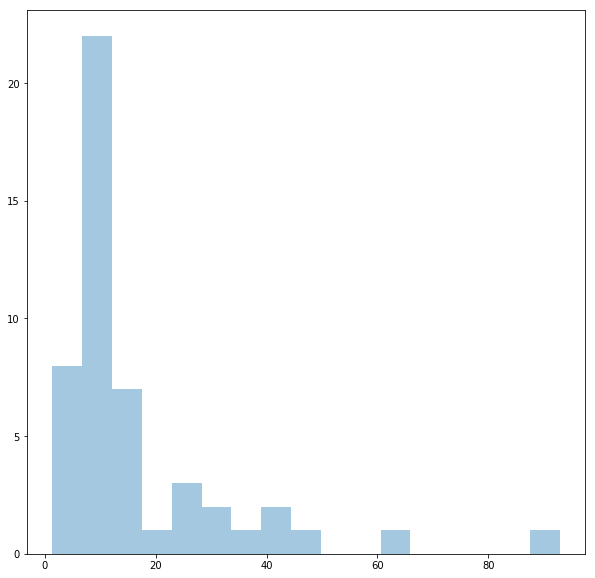

In [50]:
sns.distplot(amps, kde=False)

In [54]:
se.templates.shape

(49, 31, 49)

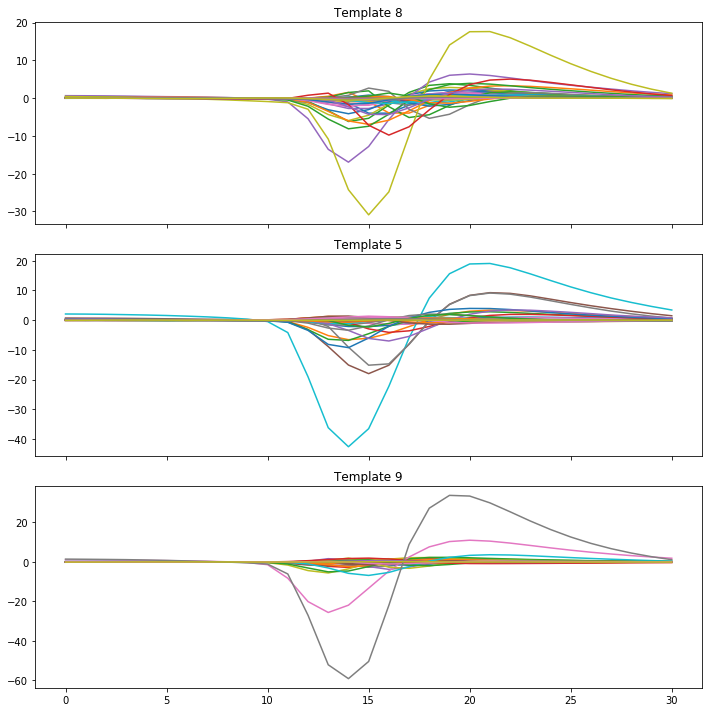

In [55]:
se.plot_templates(group_ids=[8, 5, 9])